<a href="https://colab.research.google.com/github/Nilayvekediler/AILabs/blob/master/YZproje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bir filmin IMDb puanını yapay zeka kullanarak tahmin etme.**

Python'daki uyarı mesajlarını görmezden gelmek için:

In [61]:
import warnings
warnings.filterwarnings('ignore')

Veri analizi, görselleştirme ve makine öğrenmesi için gerekli kütüphaneler eklenir. Bu kütüphaneler ve modüller şunlardır:

pandas (pd): Veri analizi ve manipülasyonu için kullanılan kütüphane.
numpy (np): Bilimsel hesaplama için kullanılan bir kütüphane.
random (rnd): Rastgele sayı üretmek için kullanılan bir kütüphane.
Görselleştirme için:

seaborn (sns): Veri görselleştirme için kullanılan bir kütüphane.
matplotlib.pyplot (plt): Veri görselleştirme için kullanılan bir kütüphane. %matplotlib inline ise Jupyter Notebook'ta grafiklerin doğrudan görüntülenmesini sağlar.
Makine öğrenmesi için:

sklearn.model_selection.train_test_split: Veriyi eğitim ve test kümelerine bölmek için kullanılan bir fonksiyon.
sklearn.svm.SVR: Destek Vektör Regresyonu (Support Vector Regression) algoritması için kullanılan bir sınıf.
sklearn.ensemble.RandomForestRegressor: Rastgele Orman Regresyonu algoritması için kullanılan bir sınıf.
sklearn.tree.DecisionTreeRegressor: Karar Ağacı Regresyonu algoritması için kullanılan bir sınıf.
Bu kütüphaneler ve modüller, veri analizi, görselleştirme ve makine öğrenmesi işlemleri için gerekli fonksiyonları ve sınıfları sağlar. Bu kod bloğu, bir veri seti üzerinde veri analizi yapmak, görselleştirme yapmak ve makine öğrenmesi algoritmalarını uygulamak için kullanılabilir.

In [62]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

İnput olarak veri dosyası csv'nin path'i girilir:

In [6]:
path=input("enter the path of movie_metadata.csv")

enter the path of movie_metadata.csv/content/movie_metadata.csv


In [63]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DataFrame df değişkenine atanır:

In [7]:
df = pd.read_csv(path)

DataFrame'in ilk 5 satırını görüntüler.

In [8]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


DF'in sütun isimlerini gösterir.

In [9]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

Veri çerçevesindeki eksik değerlere sahip olan satırları çıkarır.

In [10]:
df.dropna(inplace=True)

plt.figure(figsize=(17,8)): Figure boyutunu (genişlik, yükseklik) olarak (17, 8) piksel olarak ayarlar.
ax = sns.distplot(df['imdb_score'], bins=9, kde_kws={"bw": 0.25}, axlabel='Movie Ratings'): df['imdb_score'] sütunundaki IMDb puanlarının dağılımını gösteren bir histogram oluşturur. bins=9 parametresiyle 9 adet bar kullanır ve kde_kws={"bw": 0.25} ile çekirdek yoğunluğu kestiriminde bant genişliğini ayarlar. axlabel='Movie Ratings' ile x ekseni etiketini belirtir.
ax.set(xlim=(0, 10)): x ekseni sınırlarını (0, 10) olarak ayarlar.
ax.set_title("Distribution of Movie Ratings"): Grafik başlığını "Distribution of Movie Ratings" olarak ayarlar.
**IMDb puanlarının dağılımını gösteren bir histogram oluşturur ve grafiği belirtilen boyutta çizer.**

Text(0.5, 1.0, 'Distribution of Movie Ratings')

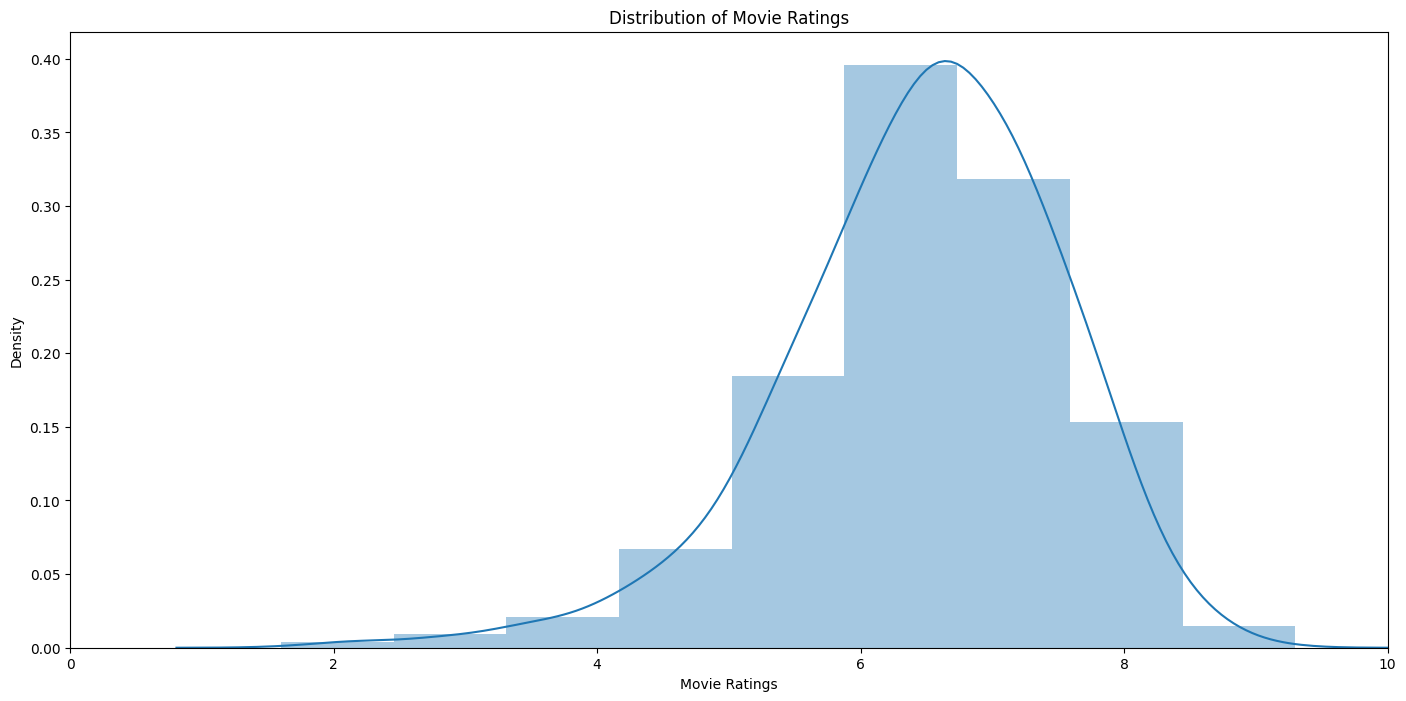

In [11]:
plt.figure(figsize=(17,8))
ax = sns.distplot(df['imdb_score'], bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='Movie Ratings')
ax.set(xlim=(0, 10))
ax.set_title("Distribution of Movie Ratings")

Bu kod, veri setindeki belirli sütunları seçerek movie_ratings adında yeni bir veri çerçevesi oluşturur. Seçilen sütunlar aşağıdaki gibidir:

imdb_score: IMDb puanı

budget: Film bütçesi

num_critic_for_reviews: Eleştirmenler tarafından yapılan inceleme sayısı

duration: Film süresi

gross: Hasılat

num_voted_users: Oy kullanan kullanıcı sayısı

cast_total_facebook_likes: Oyuncu kadrosunun toplam Facebook beğeni sayısı

movie_facebook_likes: Film Facebook sayfasının beğeni sayısı

num_user_for_reviews: Kullanıcıların film hakkında yazdığı yorum sayısı

title_year: Film çıkış yılı

In [12]:
movie_ratings = df[['imdb_score', 'budget', 'num_critic_for_reviews','duration','gross',
                    'num_voted_users','cast_total_facebook_likes', 'movie_facebook_likes',
                   'num_user_for_reviews','title_year']]

movie_ratings veri çerçevesindeki tüm satırlarda eksik değer içeren satırları kaldırma:

In [13]:
movie_ratings = movie_ratings.dropna()

Veri çerçevesindeki **değişkenler arasındaki ilişkileri görselleştirmek** için kullanılır. İlgili değişkenlerin birbirleriyle olan ilişkisini gösteren bir çiftsel dağılım grafiği oluşturur.

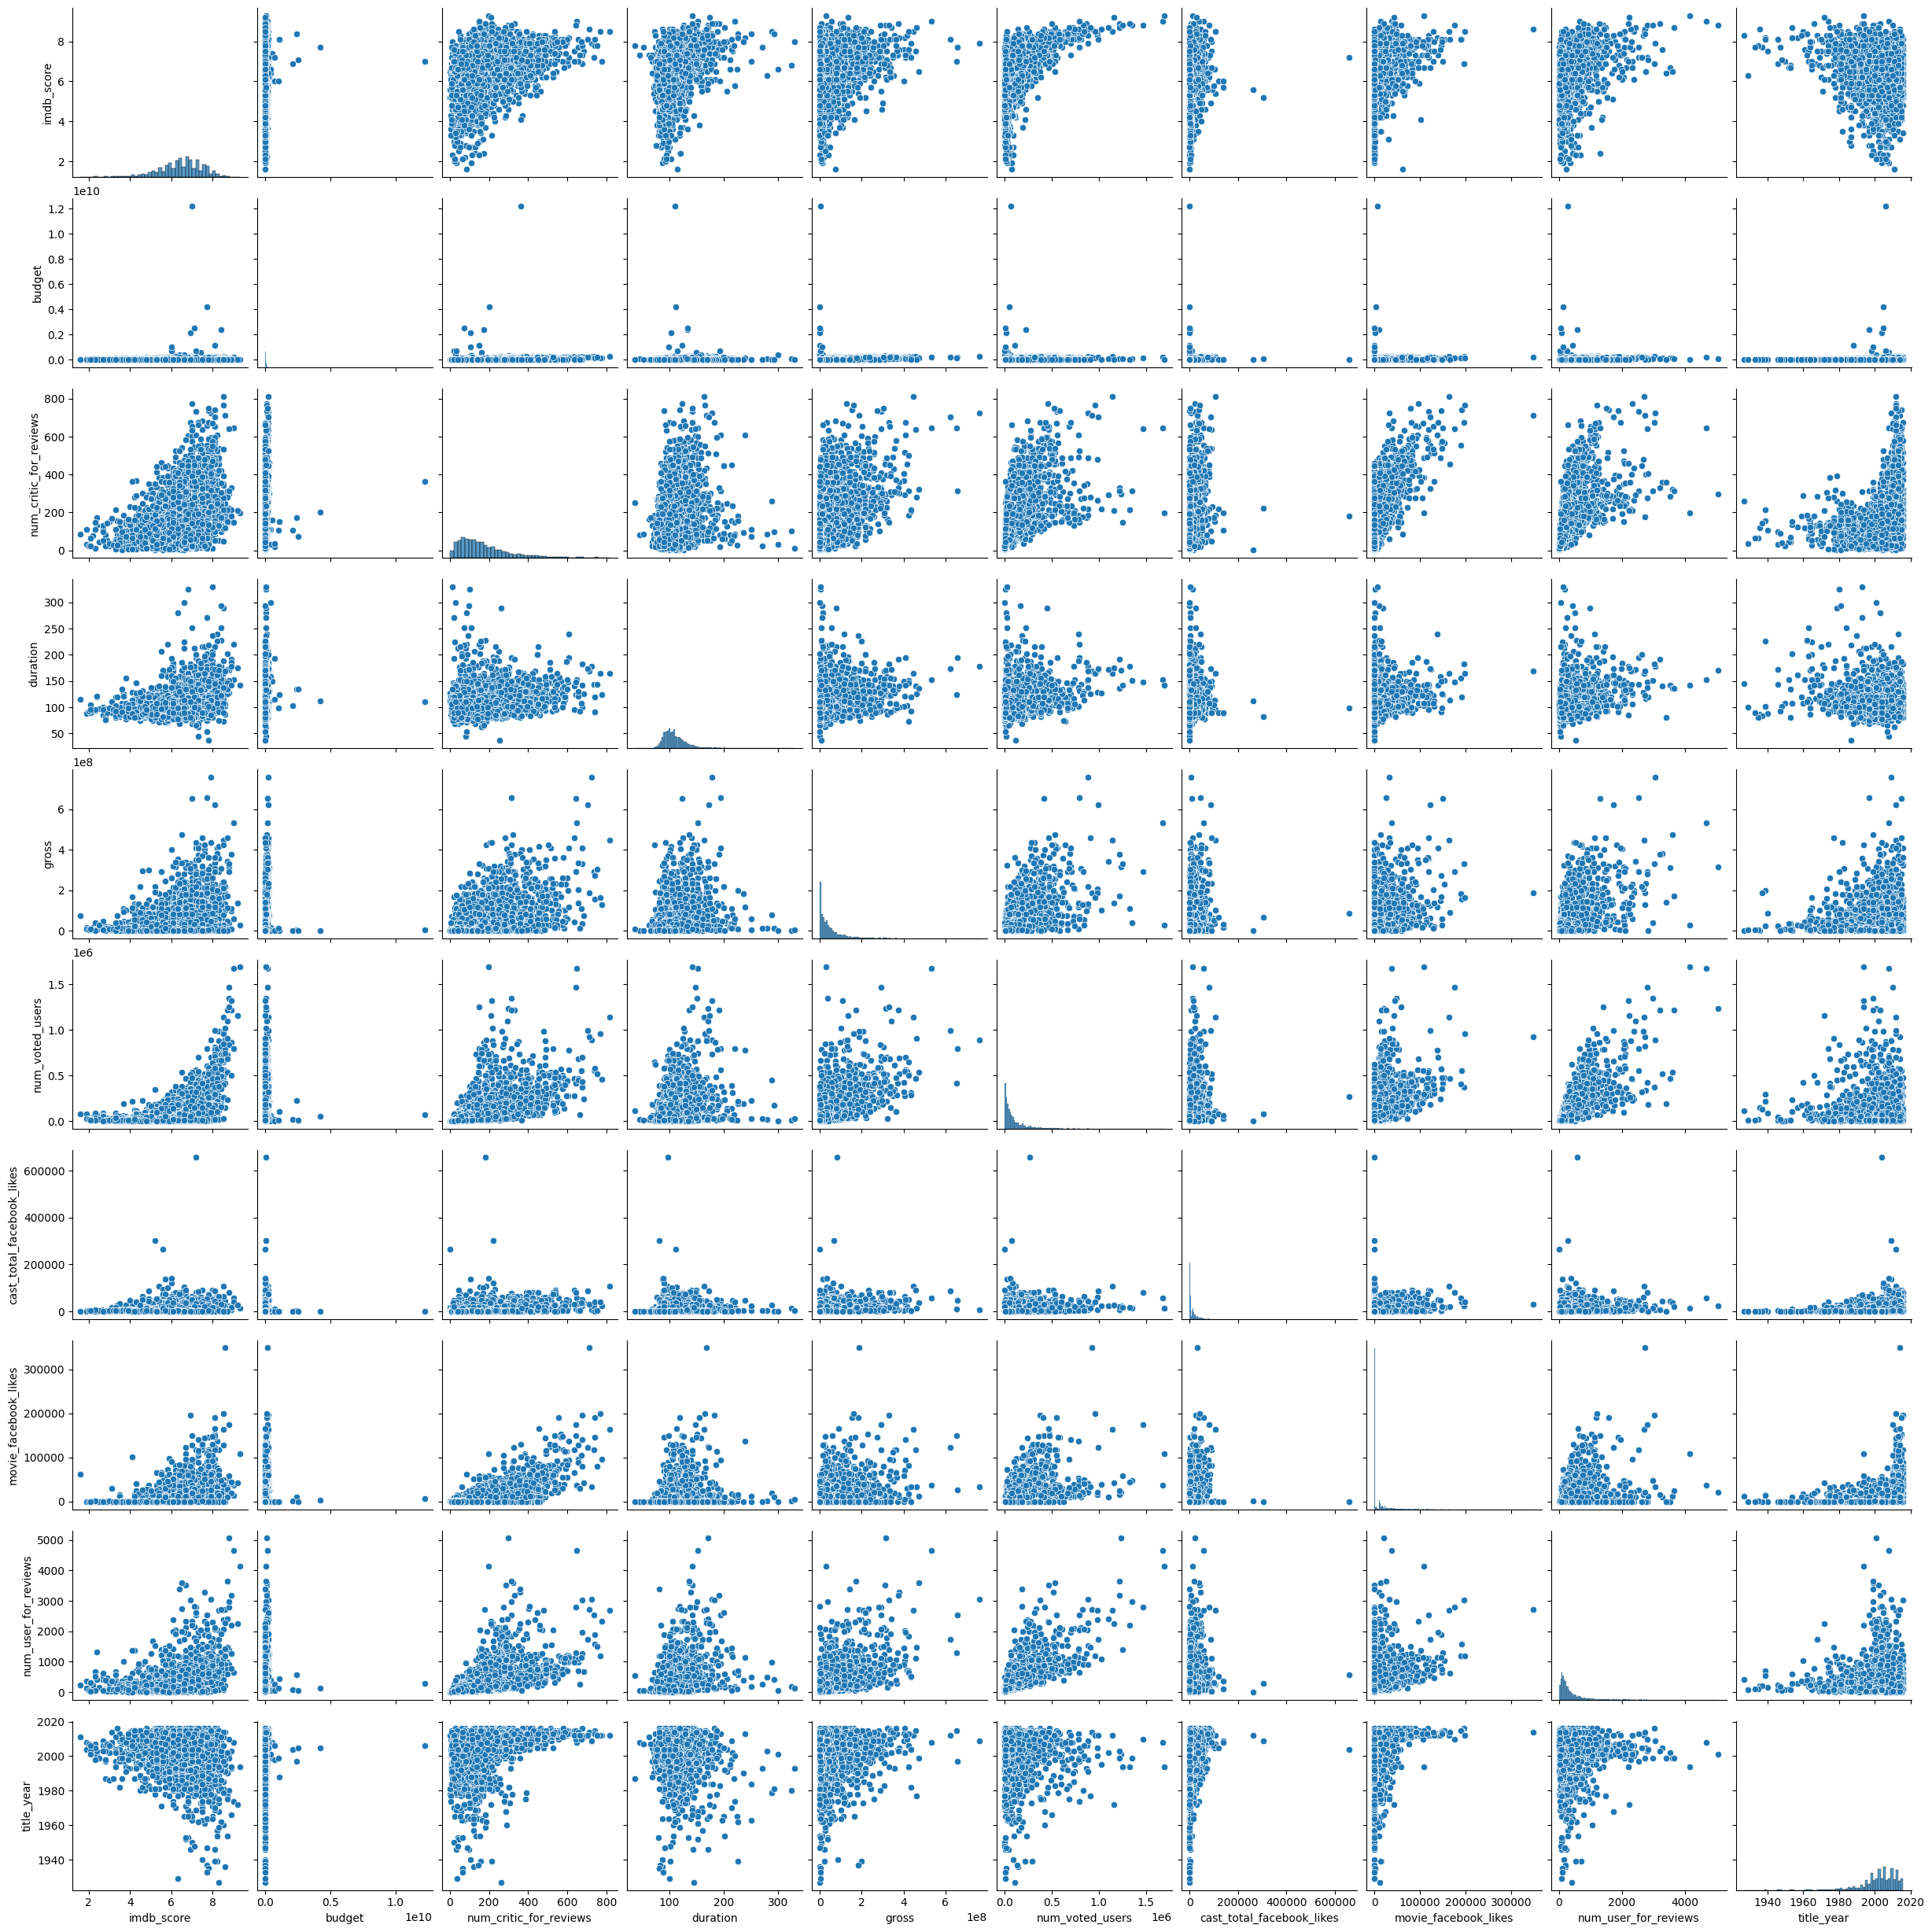

In [14]:
sns.pairplot(movie_ratings[['imdb_score', 'budget', 'num_critic_for_reviews','duration','gross',
                    'num_voted_users','cast_total_facebook_likes', 'movie_facebook_likes',
                   'num_user_for_reviews','title_year']])

Grafik, bütçe ve IMDb puanı arasındaki ilişkiyi gösterir. Y ekseni IMDb puanını temsil ederken, X ekseni bütçeyi temsil eder. Ayrıca, grafiğin üst kısmında bütçe ve IMDb puanı arasındaki regresyon doğrusu da gösterilir.

In [ ]:
sns.jointplot(x='budget', y='imdb_score', data=movie_ratings, kind='reg', height=10)
plt.xlabel('budget')
plt.ylabel('imdb_score')
plt.title('imdb rating vs budget')

Grafik, gişe geliri ve IMDb puanı arasındaki ilişkiyi gösterir. Y ekseni IMDb puanını temsil ederken, X ekseni gişe gelirini temsil eder. Ayrıca, grafiğin üst kısmında gişe geliri ve IMDb puanı arasındaki regresyon doğrusu da gösterilir.

In [ ]:
sns.jointplot(x='gross', y='imdb_score', data=movie_ratings, kind='reg', height=10)
plt.xlabel('gross')
plt.ylabel('imdb_score')
plt.title('imdb rating vs gross')

movie_ratings çerçevesindeki sütunlar

In [ ]:
movie_ratings.columns

Num_critic_for_reviews sütunu ile imdb_score sütunu arasındaki ilişkiyi gösteren bir noktalama grafiği (scatter plot) ve regresyon çizgisini içeren bir grafik:

In [ ]:
sns.jointplot(x='num_critic_for_reviews', y='imdb_score', data=movie_ratings, kind='reg', height=10)
plt.xlabel('num_critic_for_reviews')
plt.ylabel('imdb_score')
plt.title('imdb rating vs num_critic_for_reviews')

duration sütunu ile imdb_score sütunu arasındaki ilişkiyi gösteren bir noktalama grafiği (scatter plot) ve regresyon çizgisini içeren bir grafik:

In [ ]:
sns.jointplot(x='duration', y='imdb_score', data=movie_ratings, kind='reg', height=10)
plt.xlabel('duration')
plt.ylabel('imdb_score')
plt.title('imdb rating vs duration')

num_user_for_review sütunu ile imdb_score sütunu arasındaki ilişkiyi gösteren bir noktalama grafiği (scatter plot) ve regresyon çizgisini içeren bir grafik (kde parametresi yoğunluk tahmini, veri noktalarının bir yoğunluk haritası olarak temsil edildiği bir grafik oluşturur.):

In [ ]:
sns.jointplot(x='num_user_for_reviews', y='imdb_score', data=movie_ratings, kind='kde', size=10)
plt.xlabel('num_user_for_reviews')
plt.ylabel('imdb_score')
plt.title('imdb rating vs num_user_for_reviews')

movie_ratings sütunları

In [ ]:
movie_ratings.columns

Bu parametre, iki değişken arasındaki ilişkiyi göstermek için regresyon çizgisini kullanır. (kind='reg')

In [ ]:
sns.jointplot(x='title_year', y='imdb_score', data=movie_ratings, kind='reg', height=10)
plt.xlabel('title_year')
plt.ylabel('imdb_score')
plt.title('imdb rating vs title_year')

 DataFrame'den bazı sütunları (movie_imdb_link, color, movie_title, facenumber_in_poster, plot_keywords, actor_3_name, movie_imdb_link, aspect_ratio, language) çıkarır. df.drop(columns=['...']) işlemi, belirtilen sütunları DataFrame'den kaldırarak veri setini günceller.

In [23]:
df=df.drop(columns=['movie_imdb_link','color','movie_title','facenumber_in_poster', 'plot_keywords',
                    'actor_3_name','movie_imdb_link','aspect_ratio','language'])

DataFrame'deki sütunların listesini döndürür. LabelEncoder sınıfını kullanarak bazı kategorik sütunları sayısal değerlere dönüştürür. Aynı şekilde director_name, content_rating, genres, actor_1_name ve actor_2_name sütunları için de benzer bir dönüşüm yapılıyor.

Dikkat etmeniz gereken bir nokta, her bir sütun için ayrı bir LabelEncoder örneği (le) kullanmaktır. 

In [ ]:
df.columns

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df['content_rating']=le.fit_transform(df['content_rating'].values)
df['director_name']=le.fit_transform(df['director_name'].values)
df['genres']=le.fit_transform(df['genres'].values)

df['actor_1_name']=le.fit_transform(df['actor_1_name'].values)
df['actor_2_name']=le.fit_transform(df['actor_2_name'].values)

Bu kod, country sütunundaki kategorik değerleri sayısal etiketlere dönüştürür. 

In [25]:
df['country']=le.fit_transform(df['country'].values)

df veri kümesinin "imdb_score" sütunundaki değerleri y değişkenine atar. 

In [26]:
y=df['imdb_score'].values

df veri kümesindeki tüm sütunları seçer ve "imdb_score" sütununu hariç tutar. Bunu da x değişkenine atar.

In [27]:
x=df.loc[:, df.columns != 'imdb_score'].values

DataFrame'inin ilk beş satırı:

In [28]:
df.head

<bound method NDFrame.head of       director_name  num_critic_for_reviews  duration  \
0               620                   723.0     178.0   
1               538                   302.0     169.0   
2              1395                   602.0     148.0   
3               251                   813.0     164.0   
5                62                   462.0     132.0   
...             ...                     ...       ...   
5026           1167                    81.0     110.0   
5027            612                    64.0      90.0   
5033           1425                   143.0      77.0   
5035           1343                    56.0      81.0   
5042            791                    43.0      90.0   

      director_facebook_likes  actor_3_facebook_likes  actor_2_name  \
0                         0.0                   855.0          1002   
1                       563.0                  1000.0          1592   
2                         0.0                   161.0          1795   
3

# IMDB Tahmini

x ve y verilerini kullanarak eğitim ve test veri setlerini oluşturur. train_test_split fonksiyonu, verileri rastgele karıştırarak belirtilen oranda eğitim ve test veri setlerine böler.

test_size=0.2 ifadesi, verilerin yüzde 20'sinin test veri setine ayrılacağını belirtir. random_state=0 ise her çalıştırıldığında aynı veri bölünmesini elde etmek için kullanılan bir rastgelelik ayarıdır. Bu sayede, her seferinde aynı veri bölünmesi elde edilir.

Sonuç olarak, X_train ve Y_train değişkenleri eğitim veri setini, X_test ve Y_test değişkenleri ise test veri setini temsil eder. Bu veri setleri, modelin eğitim ve değerlendirme aşamalarında kullanılabilir.

In [29]:
X_train, X_test, Y_trian, Y_test= train_test_split(x,y, test_size=0.2, random_state=0)

**MAKİNE ÖĞRENMESİ ALGORİTMALARI (Random Forest, Decision Tree, Support Vector Machine, XG Boost)**

**Random Forest**

n_estimators parametresi, oluşturulacak ağaç sayısını belirler. Bu sayı ne kadar yüksekse, modelin karmaşıklığı ve genelleme yeteneği artar. 50 karar ağacı içeren bir Random Forest regresyon modeli :

In [30]:
randregrssor=RandomForestRegressor(n_estimators=50)

randregressor adlı RandomForestRegressor nesnesini eğitmek için X_train eğitim verilerini ve Y_train hedef değerlerini kullanır. Eğitim işlemi, karar ağaçlarından oluşan Random Forest modelini eğitir ve verilere uygun bir regresyon modeli oluşturur.

In [31]:
randregrssor.fit(X_train,Y_trian)

RandomForestRegressor(n_estimators=50)

eğitilen Random Forest regresyon modelini kullanarak X_test verileri üzerinde tahmin yapar ve sonuçları predictions değişkenine atar. 

In [ ]:
predictions = randregrssor.predict(X_test)

Tahminlerimizle gerçek değerler arasındaki mutlak farkı hesaplar ve bu hataları errors değişkenine atar. 

In [33]:
errors = abs(predictions - Y_test)

Hata miktarının ortalama değerini hesaplamak için kullanılır. Sonuç tahminlerin genellikle gerçek puanın yaklaşık olarak 0.51 puan sapmasına sahip olduğunu gösterir.

In [34]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.52 degrees.


 Ortalama mutlak yüzde hata (MAPE) hesaplamasını yapar ve doğruluğu (accuracy) hesaplar. 

In [35]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.59 %.


Tahmin edilen imdb puanlarını ve gerçek imdb puanlarını bir grafik üzerinde çizmeyi sağlar. plt.plot(predictions) satırı, tahmin edilen imdb puanlarını çizgi grafiği olarak gösterirken, plt.plot(Y_test) satırı, gerçek imdb puanlarını çizgi grafiği olarak gösterir. 

Mavi çizgiler predictions (tahminler) olarak belirtilen veriyi temsil ederken, turuncu çizgiler Y_test (gerçek değerler) olarak belirtilen veriyi temsil etmektedir. İki çizgi arasındaki fark, tahmin edilen ve gerçek imdb puanları arasındaki farkı göstermektedir.

Mavi çizgilerin turuncu çizgilere ne kadar yakınsa modelin imdb puanlarını ne kadar doğru tahmin ettiği söylenebilir. İdeal durumda, mavi ve turuncu çizgiler birbirine mümkün olduğunca yakın olmalıdır, bu da modelin doğru tahminler yaptığı anlamına gelir.

(0.0, 10.0)

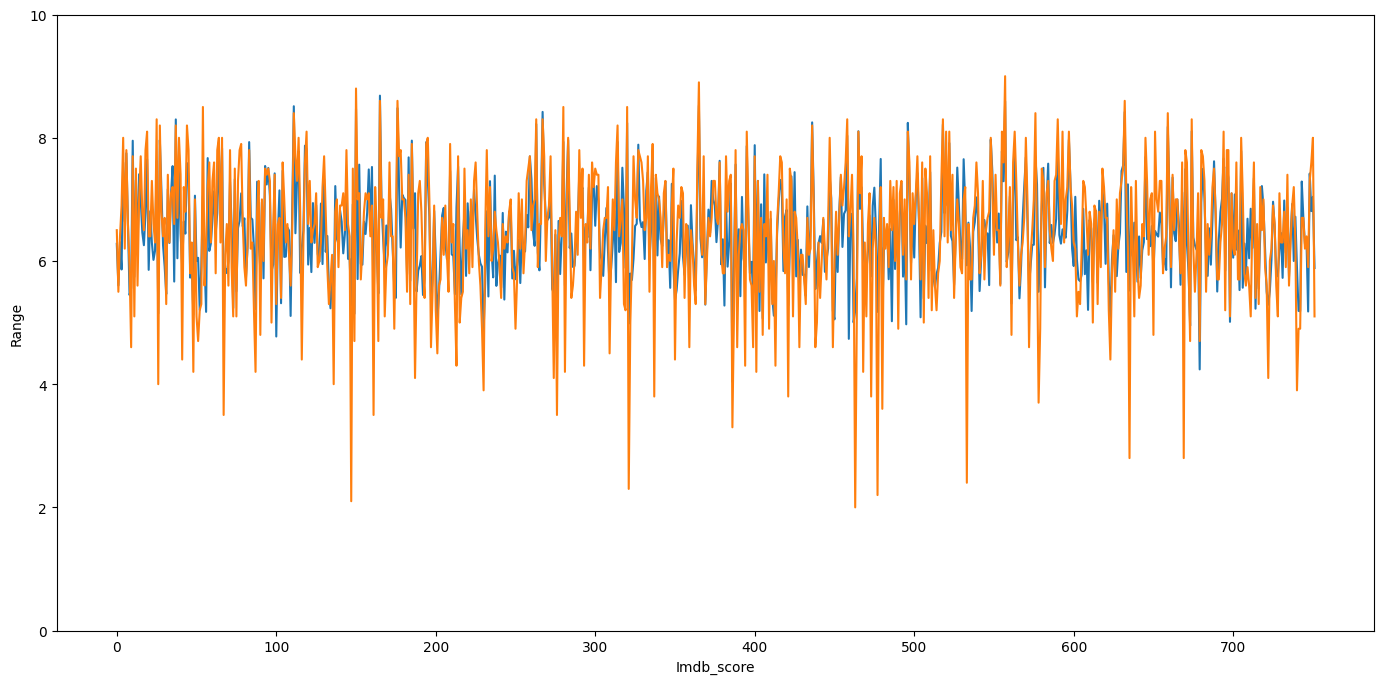

In [36]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

**Decision Tree**

In [37]:
dr=DecisionTreeRegressor()

In [38]:
dr.fit(X_train,Y_trian)

DecisionTreeRegressor()

In [39]:
predictions = dr.predict(X_test)

In [40]:
errors = abs(predictions - Y_test)

In [41]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.72 degrees.


In [42]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
    

Accuracy: 87.26 %.


(0.0, 10.0)

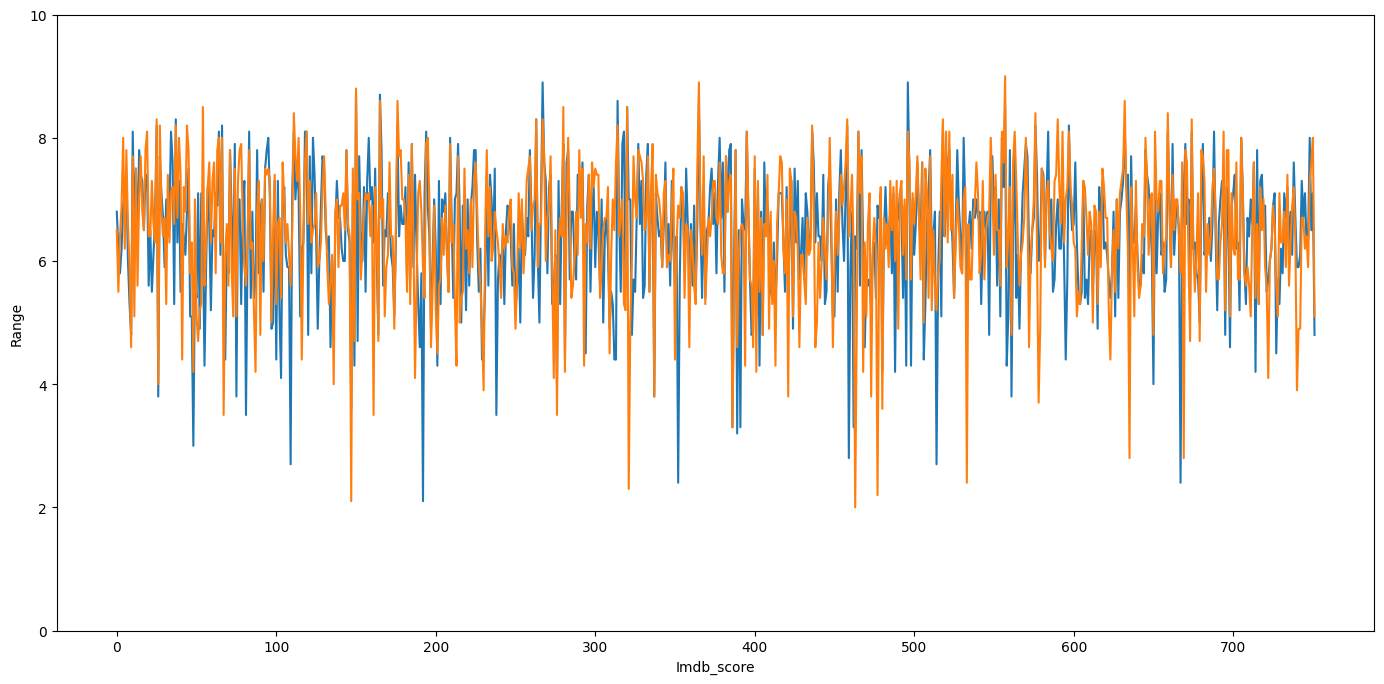

In [43]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

**Support Vector Machine**

In [ ]:
svm=SVR()

In [45]:
svm.fit(X_train,Y_trian)

SVR()

In [46]:
predictions = svm.predict(X_test)

In [47]:
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')
    

Mean Absolute Error: 0.78 degrees.
Accuracy: 85.77 %.


(0.0, 10.0)

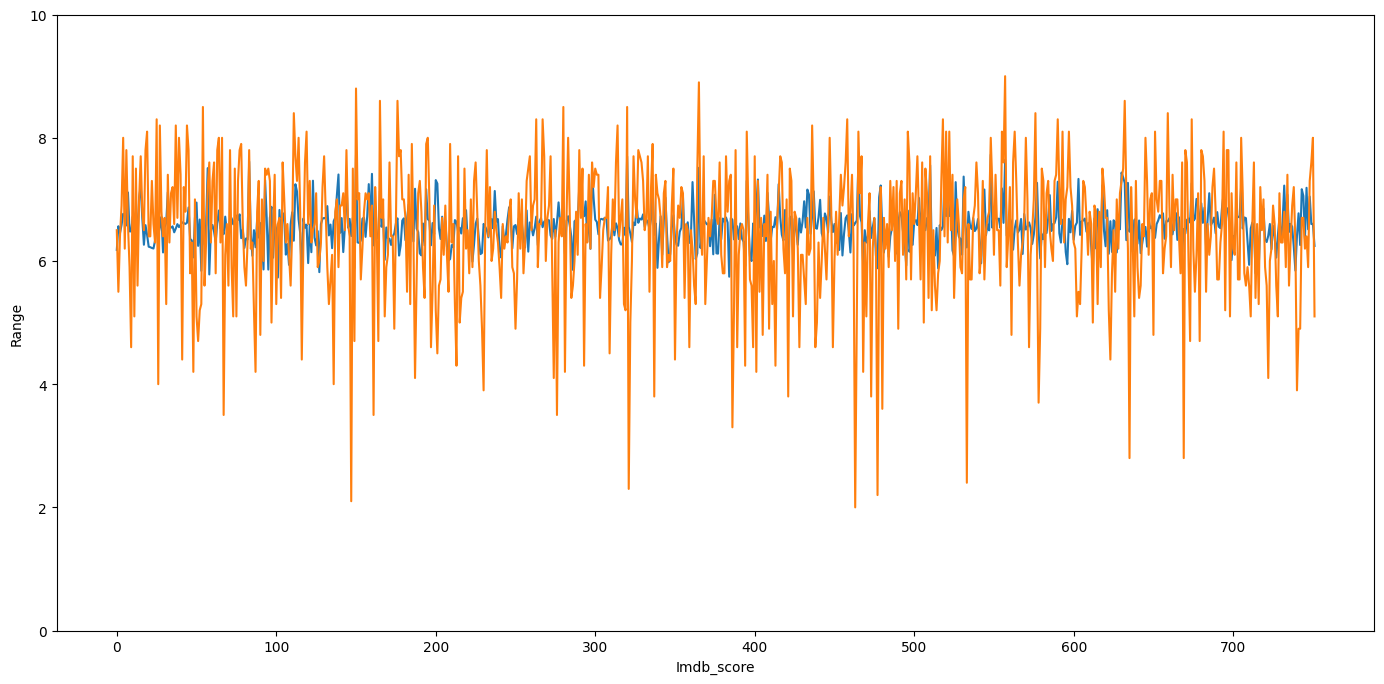

In [48]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

**XG Boost**

In [49]:
from xgboost import XGBRegressor

In [50]:
xgboost=XGBRegressor(n_estimators=50)

In [51]:
xgboost.fit(X_train,Y_trian)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [52]:
predictions=xgboost.predict(X_test)

In [53]:
errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.49 degrees.
Accuracy: 91.12 %.


(0.0, 10.0)

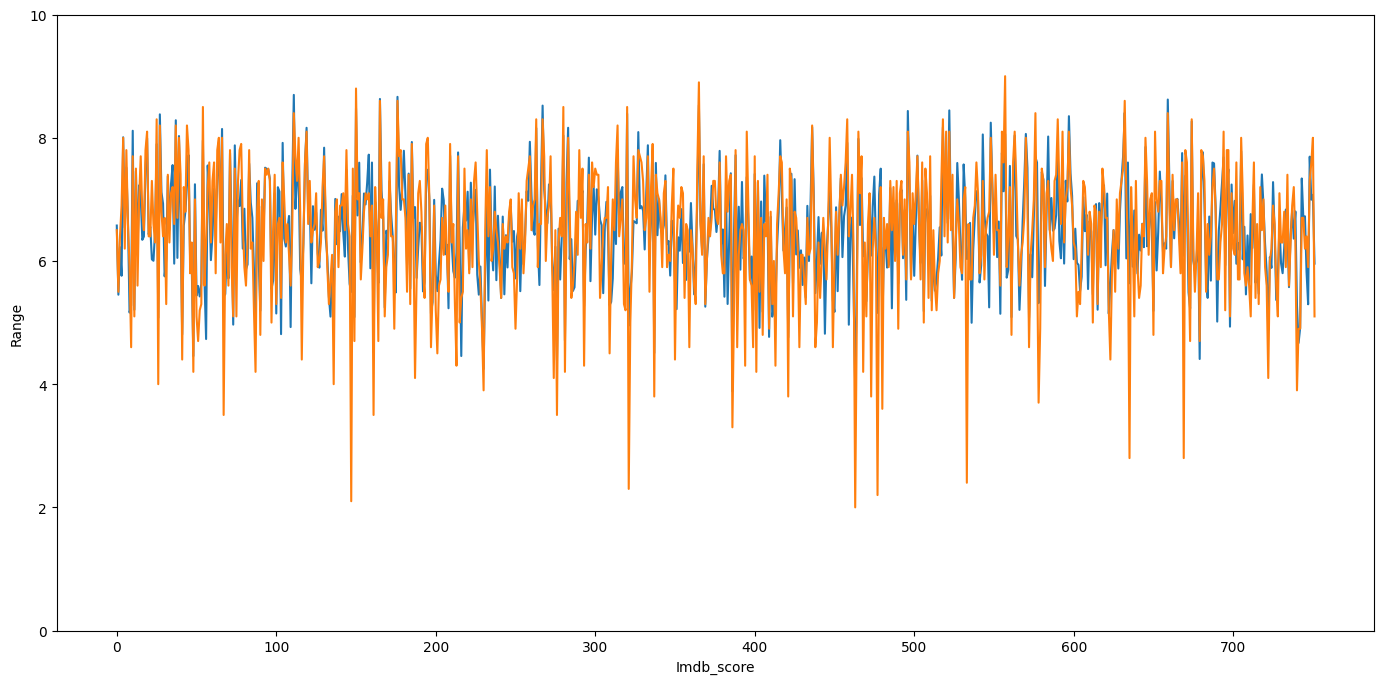

In [54]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

**YAPAY SİNİR AĞI**

 Keras kullanarak bir yapay sinir ağı modeli oluşturur ve model özetini görüntüler:

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

500 epoch (iterasyon) üzerinde veri setini kullanarak yapay sinir ağı modelinin eğitilmesi :

In [56]:

model.fit(X_train, Y_trian, epochs=500, batch_size=32, validation_split = 0.2)

Epoch 1/500
76/76 [==============================] - 2s 10ms/step - loss: 57634.0117 - mean_absolute_error: 57634.0117 - val_loss: 2901.8425 - val_mean_absolute_error: 2901.8425
Epoch 2/500
76/76 [==============================] - 1s 7ms/step - loss: 3606.2671 - mean_absolute_error: 3606.2671 - val_loss: 4142.6816 - val_mean_absolute_error: 4142.6816
Epoch 3/500
76/76 [==============================] - 1s 7ms/step - loss: 2390.4233 - mean_absolute_error: 2390.4233 - val_loss: 5119.8882 - val_mean_absolute_error: 5119.8882
Epoch 4/500
76/76 [==============================] - 1s 7ms/step - loss: 2080.6729 - mean_absolute_error: 2080.6729 - val_loss: 1503.7506 - val_mean_absolute_error: 1503.7506
Epoch 5/500
76/76 [==============================] - 1s 7ms/step - loss: 1489.6937 - mean_absolute_error: 1489.6937 - val_loss: 1232.3000 - val_mean_absolute_error: 1232.3000
Epoch 6/500
76/76 [==============================] - 1s 7ms/step - loss: 773.6310 - mean_absolute_error: 773.6310 - val_lo

In [ ]:
predictions = model.predict(X_test)

In [ ]:

errors = abs(predictions - Y_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

In [ ]:
plt.figure(figsize=(17,8))
plt.plot(predictions)
plt.plot(Y_test)
plt.xlabel("Imdb_score")
plt.ylabel("Range")
plt.ylim(0, 10)

In [64]:
print(X_train)


[[9.580e+02 3.230e+02 9.100e+01 ... 2.008e+03 9.460e+02 6.000e+03]
 [1.320e+02 1.900e+01 7.500e+01 ... 1.997e+03 2.000e+00 1.780e+02]
 [6.290e+02 2.000e+01 1.390e+02 ... 1.995e+03 1.500e+01 1.270e+02]
 ...
 [1.086e+03 1.190e+02 8.100e+01 ... 2.014e+03 7.000e+03 1.200e+04]
 [1.494e+03 1.670e+02 1.010e+02 ... 2.009e+03 6.680e+02 0.000e+00]
 [1.253e+03 2.500e+01 1.250e+02 ... 2.003e+03 1.470e+02 0.000e+00]]


In [69]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Veri kümesini yükle
data = pd.read_csv('movie_metadata.csv')

# İlgili filmi seç
film_title = "Harry Potter and the Chamber of Secrets"
selected_film = data[data['movie_title'] == film_title]

# Benzerlik ölçümü için kullanılacak özellikler
features = ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes']

# Seçili film ile diğer filmler arasındaki benzerlikleri hesapla
similarities = cosine_similarity(selected_film[features], data[features])

# Benzerlik skorlarına göre filmleri sırala
similar_films = data.iloc[similarities.argsort()[0][-4:-1]]['movie_title'].values

# Sonuçları yazdır
print("Seçili film: ", film_title)
print("Benzer filmler:")
for film in similar_films:
    print(film)


ValueError: ignored